In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
# Shape of the dataset
df.shape

(48895, 16)

### Checking for Null Values

In [6]:
# Checking for null values.
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

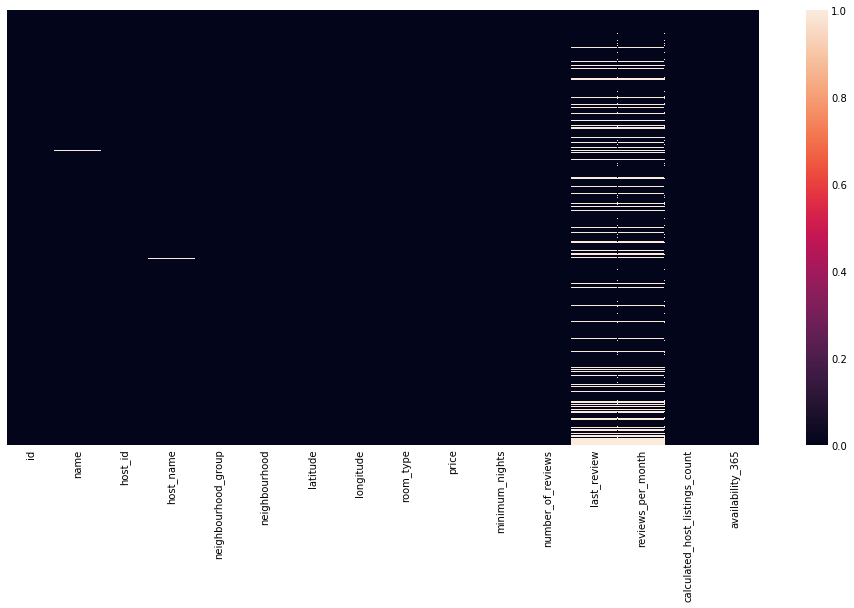

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), yticklabels=False)

####  last_review  & reviews_per_month have the maximum missing values. few are also persent in hostname and name.

### Checking Statistics for Numerical Features

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


### Checking Statistics for Categorical Features 

In [9]:
df.describe(include='O').T

,count,unique,top,freq
name,48879,47905,Hillside Hotel,18
host_name,48874,11452,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409
last_review,38843,1764,2019-06-23,1413


### Correlation among features 

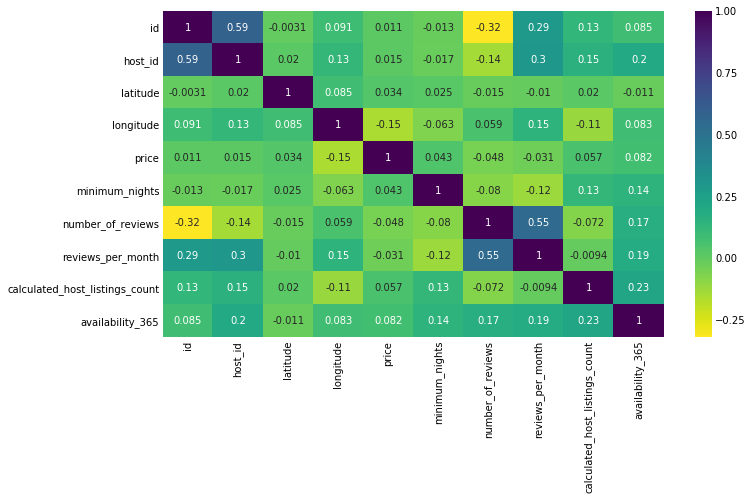

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis_r')

In [11]:
df.corr()['price'].sort_values(ascending=False)

price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
host_id                           0.015309
id                                0.010619
reviews_per_month                -0.030608
number_of_reviews                -0.047954
longitude                        -0.150019
Name: price, dtype: float64

# Exploratory Data Analysis

## Univariate Analysis

### Feature: price

Text(0.5, 0, 'log(1+price)')

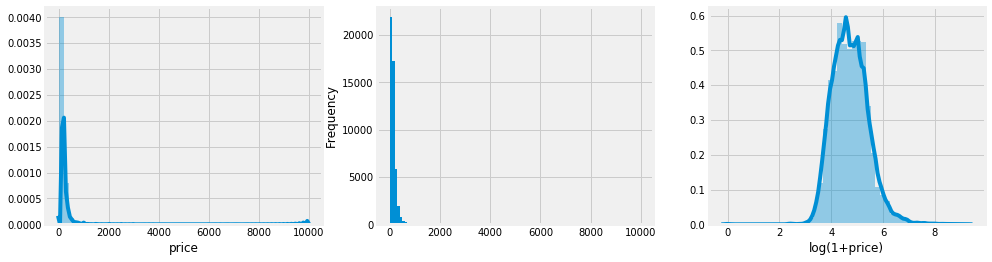

In [12]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.distplot(df['price'])
plt.subplot(1, 3, 2)
df['price'].plot.hist(bins=100)

plt.subplot(1, 3, 3)
sns.distplot(np.log1p(df['price']))
plt.xlabel('log(1+price)')

#### This seems to be skewed and not normally distributed. This will be handled later. The log(1+price) plot gives a bell shaped curve.

### Feature: latitude and longitude 

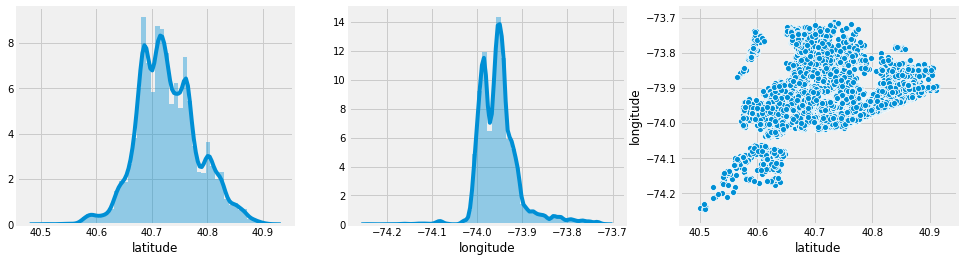

In [13]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.distplot(df['latitude'])

plt.subplot(1, 3, 2)
sns.distplot(df['longitude'])

plt.subplot(1, 3, 3)
sns.scatterplot(x= df['latitude'], y=df['longitude'])

#### There seem to be a correlation between Longitude and latitude, as the locations of properties tend to come from clusters. 

### Feature: minimum_nights

Text(0.5, 0, 'log(1+minimum_nights)')

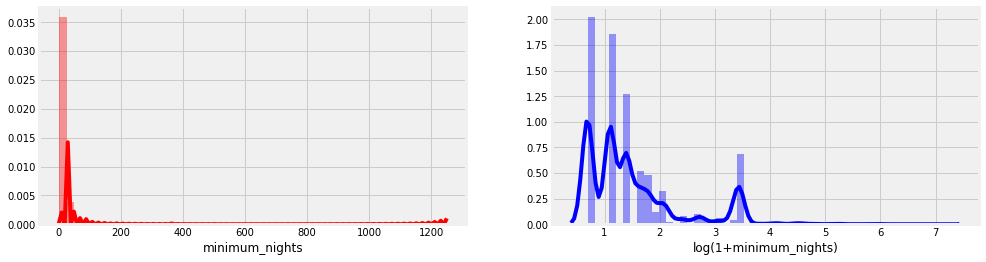

In [14]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.distplot(df['minimum_nights'], color='red')

plt.subplot(1, 2, 2)
sns.distplot(np.log1p(df['minimum_nights']), color='blue')
plt.xlabel('log(1+minimum_nights)')

#### The feature minimum_nights is skewed on the left plot. If we log-transform it, it becomes more or less normal. 

### Feature: number_of_reviews 

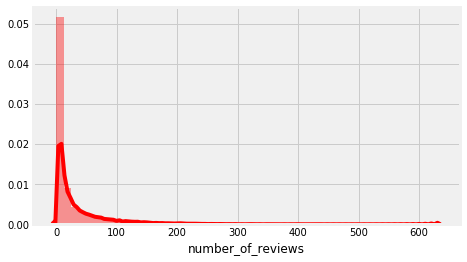

In [15]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.distplot(df['number_of_reviews'], color='red')

# plt.subplot(1, 2, 2)
# sns.distplot(np.log1p(df['number_of_reviews']), color='blue')
# plt.xlabel('log(1+number_of_reviews)')

### Feature: calculated_host_listings_count 

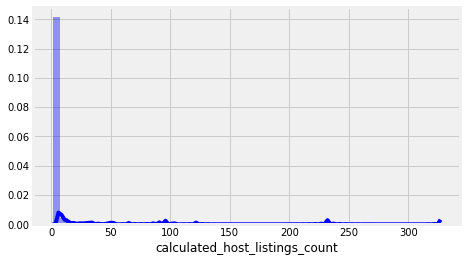

In [16]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.distplot(df['calculated_host_listings_count'], color='blue')

### Feature: availability_365 

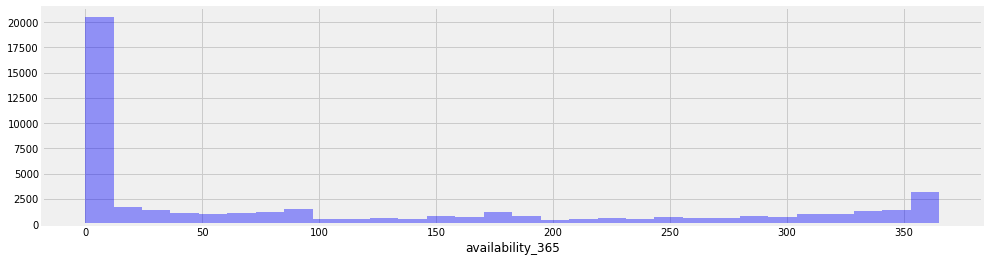

In [17]:
plt.figure(figsize=(15, 4))

#plt.subplot(1, 2, 1)
sns.distplot(df['availability_365'], color='blue', kde=False)

#### This distribution is highly skewed towards the low and high end. The dataset contains lots of properties that are available only for a few days each year, and a good number that are available for more than 300 days

### ------- Categorical Features -------

### Feature: neighbourhood_group

In [18]:
df['neighbourhood_group'].value_counts(normalize=True)*100

Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: neighbourhood_group, dtype: float64

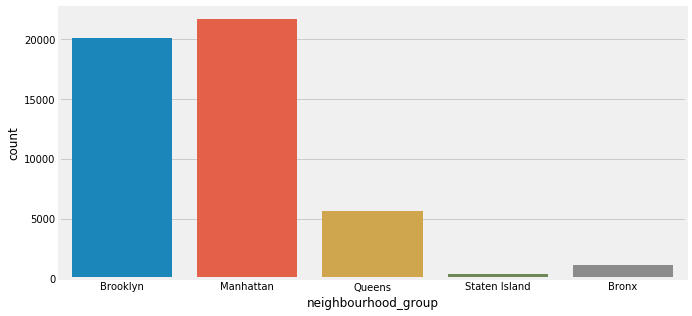

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(df['neighbourhood_group'])

#### Manhattan has the highest number in 'neighbourhood_group', followed by Brooklyn, while Staten Island has the minimum.

### Feature: neighbourhood

In [20]:
df['neighbourhood'].value_counts(normalize=True)*100

Williamsburg                  8.017180
Bedford-Stuyvesant            7.595869
Harlem                        5.436139
Bushwick                      5.041415
Upper West Side               4.031087
Hell's Kitchen                4.004499
East Village                  3.789754
Upper East Side               3.677268
Crown Heights                 3.198691
Midtown                       3.159832
East Harlem                   2.284487
Greenpoint                    2.280397
Chelsea                       2.276306
Lower East Side               1.863176
Astoria                       1.840679
Washington Heights            1.838634
West Village                  1.570713
Financial District            1.521628
Flatbush                      1.270069
Clinton Hill                  1.169854
Long Island City              1.098272
Prospect-Lefferts Gardens     1.094181
Park Slope                    1.034871
East Flatbush                 1.022599
Fort Greene                   1.000102
Murray Hill              

<BarContainer object of 10 artists>

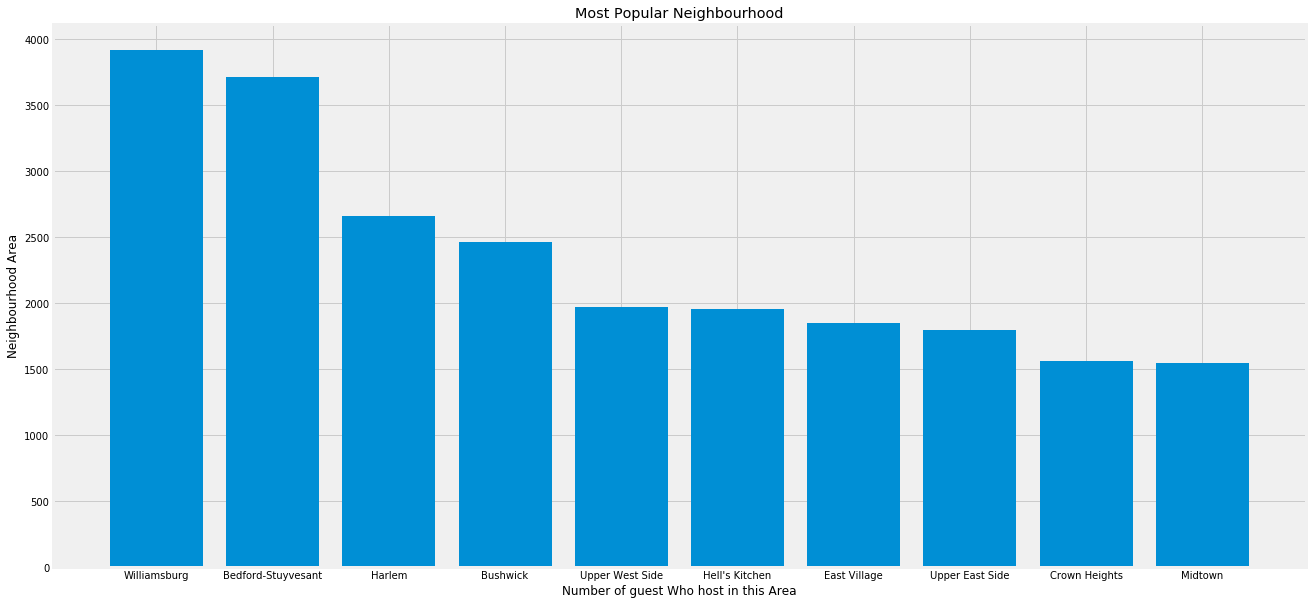

In [21]:
# Considering the 1st 10 neighbourhoods while ploting.

data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(20, 10))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.bar(x, y)

### Feature: room_type

In [22]:
df['room_type'].value_counts(normalize=True)*100

Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: room_type, dtype: float64

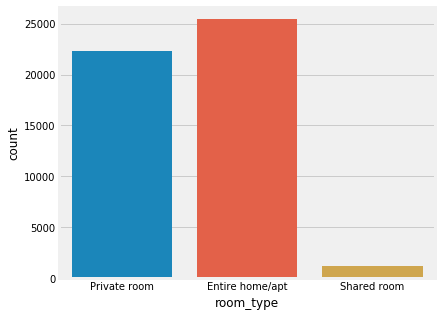

In [23]:
plt.figure(figsize=(6, 5))
sns.countplot(df['room_type'])

#### 'Entire home/apt' has very high demand while 'Shared room' has the least demand.

In [24]:
df['last_review'].value_counts(normalize=True)*100

2019-06-23    3.637721
2019-07-01    3.498700
2019-06-30    3.452359
2019-06-24    2.252658
2019-07-07    1.848467
2019-07-02    1.693999
2019-06-22    1.686276
2019-06-16    1.547254
2019-07-05    1.493191
2019-07-06    1.454574
2019-06-29    1.361893
2019-06-21    1.361893
2019-06-19    1.096723
2019-07-03    1.096723
2019-06-25    1.088999
2019-06-20    1.083850
2019-06-28    1.027212
2019-01-01    1.024638
2019-06-26    1.004042
2019-06-09    0.986021
2019-06-17    0.967999
2019-06-15    0.952553
2019-05-27    0.893340
2019-06-18    0.875319
2019-06-27    0.859872
2019-07-04    0.849574
2019-01-02    0.769765
2019-06-10    0.767191
2019-06-02    0.749170
2019-05-31    0.741446
                ...   
2015-03-06    0.002574
2013-07-14    0.002574
2017-02-09    0.002574
2017-11-03    0.002574
2016-02-19    0.002574
2014-05-13    0.002574
2016-05-05    0.002574
2016-02-04    0.002574
2015-06-01    0.002574
2016-02-05    0.002574
2013-09-16    0.002574
2015-05-13    0.002574
2015-04-27 

<BarContainer object of 10 artists>

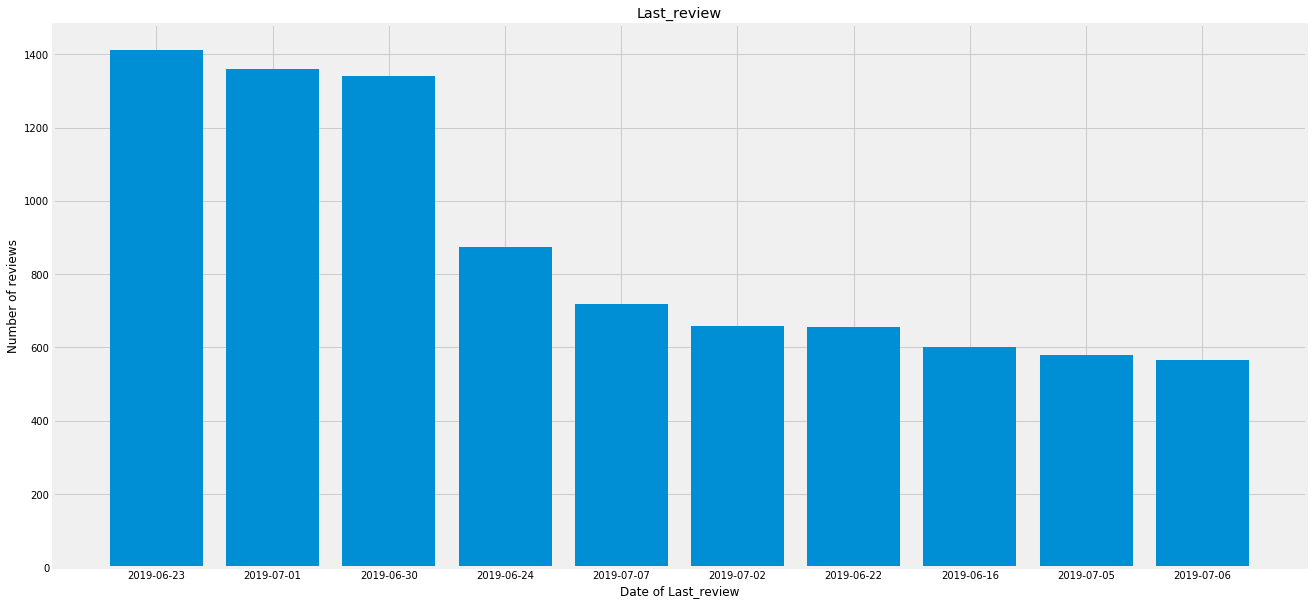

In [25]:
# Considering the 1st 10 'last_reviews' while ploting.

lr = df['last_review'].value_counts()[:10]
plt.figure(figsize=(20, 10))
x = list(lr.index)
y = list(lr.values)

plt.title("Last_review")
plt.ylabel("Number of reviews")
plt.xlabel("Date of Last_review")

plt.bar(x, y)

## Bivariate Analysis

### availability_365  Vs price

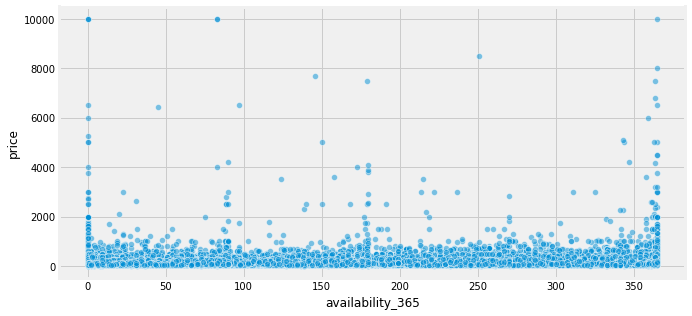

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'availability_365', y = 'price', data = df, alpha = 0.5)

#### Larger availability tends to have a more price

### calculated_host_listings_count Vs price

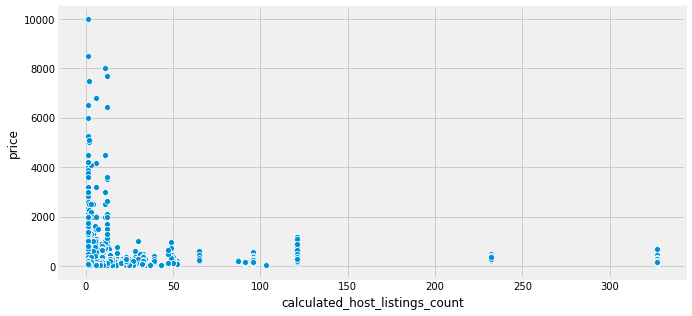

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'calculated_host_listings_count', y = 'price', data = df)

### minimum_nights Vs price 

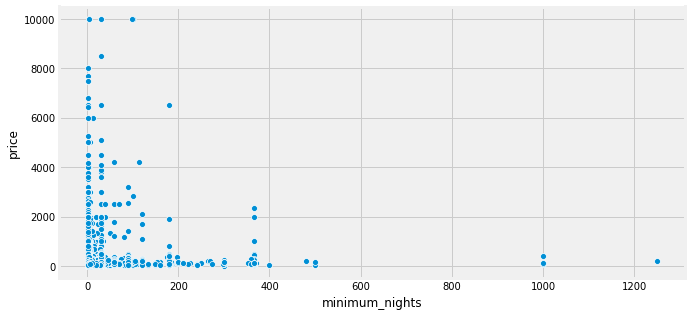

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'minimum_nights', y = 'price', data = df)

# Feature Engineering 

#### price & minimum_nights are log transformed to make the distrubution normal as seen above in the EDA plots.

In [29]:
df['price'] = np.log1p(df['price'])
df['minimum_nights'] = np.log1p(df['minimum_nights'])

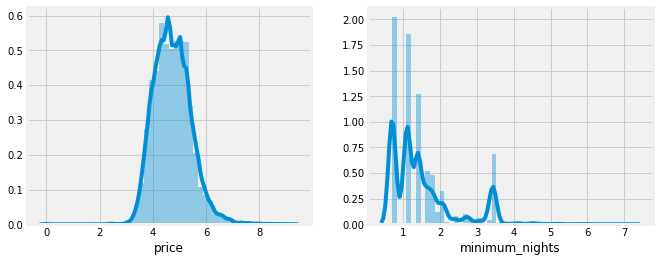

In [30]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.distplot(df['price'])
plt.subplot(1, 2, 2)
sns.distplot(df['minimum_nights'])

### Handling Null values 

####  name, host_name & reviews_per_month have null values. name & host_name will be dropped. The rest can be filles with 0

In [31]:
#df['last_review'] = df['last_review'].fillna('2019-06-23')
df['reviews_per_month'] = df['reviews_per_month'].fillna(value=0)


In [32]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [33]:
df = df.drop(['host_id', 'id', 'name', 'host_name', 'last_review'], axis=1)
df.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,5.010635,0.693147,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,5.420535,0.693147,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,5.017280,1.386294,0,0.00,1,365


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null float64
minimum_nights                    48895 non-null float64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 4.1+ MB


### Dummy Encoding

In [35]:
df = pd.get_dummies(data=df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'])
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,5.010635,0.693147,9,0.21,6,365,0,1,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,5.420535,0.693147,45,0.38,2,355,0,0,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,5.017280,1.386294,0,0.00,1,365,0,0,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,4.499810,0.693147,270,4.64,1,194,0,1,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,4.394449,2.397895,9,0.10,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Model Building 

In [36]:
from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor

In [37]:
X = df.drop('price', axis=1)
y = df['price']

In [38]:
# Performing train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Linear Regression 

In [40]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
mse = mean_squared_error(y_train, linreg.predict(X_train))
rmse = np.sqrt(mse)
rmse

0.46917922255959704

In [41]:
#CROSS VALIDATION

cross_mse = cross_val_score(linreg, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

4999646144469.494

### Linear SVR 

In [42]:
svr = LinearSVR()
svr.fit(X_train, y_train)

mse = mean_squared_error(y_train, svr.predict(X_train))
rmse = np.sqrt(mse)
rmse

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.49433536711648035

In [43]:
#CROSS VALIDATION

cross_mse = cross_val_score(svr, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

0.5000298815943964

### RandomForestRegressor

In [44]:
rf = RandomForestRegressor(max_depth=15, min_samples_leaf=100, n_jobs=-1)
rf.fit(X_train, y_train)

mse = mean_squared_error(y_train, rf.predict(X_train))
rmse = np.sqrt(mse)
rmse

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.4522649759866014

In [45]:
#CROSS VALIDATION

cross_mse = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

0.4645618561513524

### KNeighborsRegressor

In [46]:
knn = KNeighborsRegressor(n_neighbors=10, n_jobs=-1)
knn.fit(X_train, y_train)

mse = mean_squared_error(y_train, knn.predict(X_train))
rmse = np.sqrt(mse)
rmse

0.4283473387268517

In [47]:
#CROSS VALIDATION

cross_mse = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

0.4771133423816183

### Decision Tree 

In [48]:
dtree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
dtree.fit(X_train, y_train)

mse = mean_squared_error(y_train, dtree.predict(X_train))
rmse = np.sqrt(mse)
rmse

0.45278499192576604

In [49]:
# #CROSS VALIDATION

cross_mse = cross_val_score(dtree, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

0.4684034659522546

#### RandomForestRegressor is used for this dataset. 

#### Hyperparameter tuning code is below 

In [50]:
#Number of trees in the forest
##n_estimators = [int(x) for x in np.linspace(start = 200, stop=2000,num=10)]
n_estimators = [200,  300, 500]
max_features = ['auto', 'sqrt']
#max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth = [10,30,50]
#max_depth.append(None)
#min_samples_split = [2,5,10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

gscv_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
     #   'max_depth': max_depth,
     #   'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

In [51]:
rf_random = GridSearchCV(estimator=rf, param_grid = gscv_grid, cv = 5, n_jobs=-1)

rf_random.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=15, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=100,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'

In [52]:
final_rf = RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=15, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=100,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False)

In [53]:
final_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [54]:
mse = mean_squared_error(y_train, dtree.predict(X_train))
rmse = np.sqrt(mse)
rmse

0.45278499192576604

In [55]:
# #CROSS VALIDATION

cross_mse = cross_val_score(dtree, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

0.4684037669963546